$$\textbf{Blatt 08 - Praktische Optimierung - Adrian Lentz, Robert Schönewald}$$

Lösungen und Erklärungen für Blatt 08. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.random.seed(0)

$$\textbf{Teil a}$$

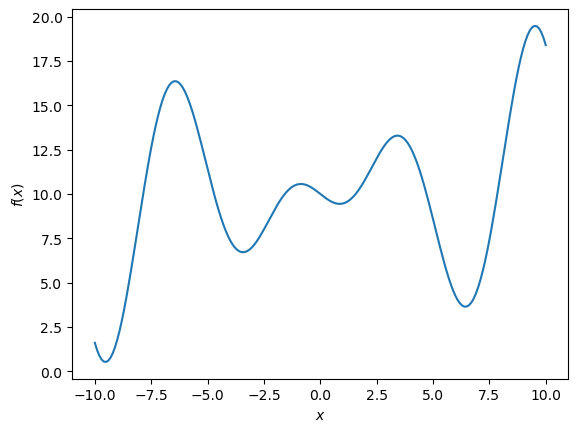

In [24]:
def true_fun(x):
    return 10 - x * np.cos(x)

LOWER = -10
UPPER = 10
N_Samples = 11
X_samples=np.linspace(LOWER,UPPER,N_Samples)
y_samples=true_fun(X_samples)

X = np.linspace(LOWER, UPPER, 201)  #201 äquidistante Stellen
plt.plot(X, true_fun(X), label="True function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

plt.show()

$$\textbf{Polynomial Modell}$$

In [32]:
def make_poly_model(f, k, X_samples, y_samples):
    # Erstellung der Polynomialfeatures und Lineare Regression
    polynomial_features = PolynomialFeatures(degree=k, include_bias=True)
    linear_regression = LinearRegression()
    pipe = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    # Modell an den gegebenen Samples fitten
    pipe.fit(X_samples.reshape(-1,1), y_samples.reshape(-1,1))

    return lambda x: pipe.predict(np.array(x).reshape(-1,1)).flatten()


#Test 
#pred_fun = make_poly_model(true_fun, k=1) #k=1,2,5,10,15
#pred_fun(1)

In [41]:
degrees = [1,2,5,10,15] #k=1,2,5,10,15
NUM_OF_REPEATS = 1

pred_funcs = {}
for degree in degrees:
    pred_funcs[degree]=[]
    for _ in range(NUM_OF_REPEATS):
        pred_funcs[degree].append(make_poly_model(true_fun, k=degree, X_samples=X_samples, y_samples=y_samples))

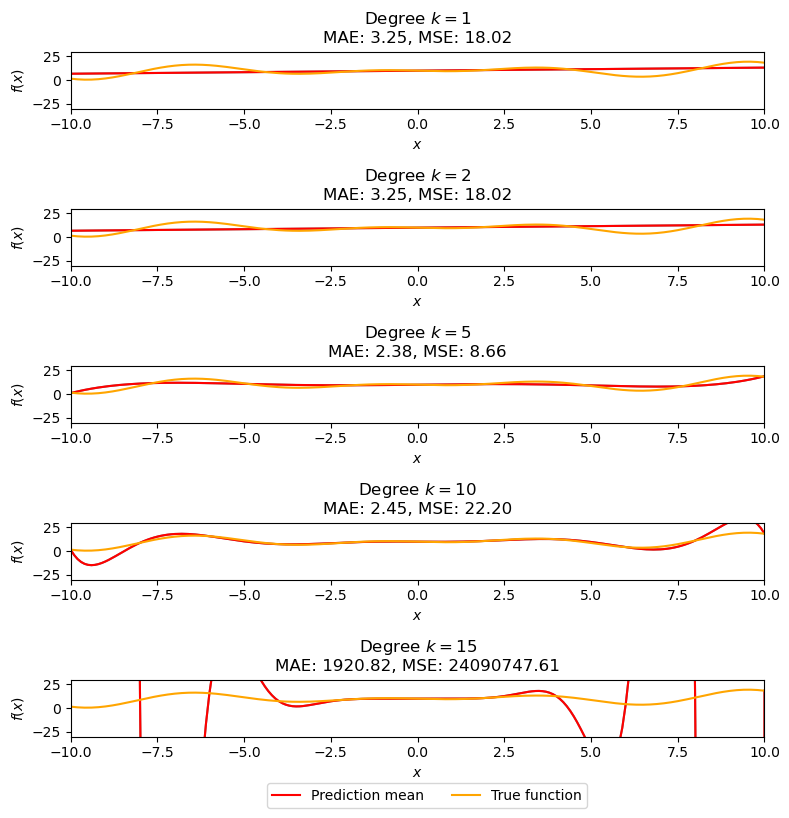

In [42]:
fig = plt.figure(figsize=(8, 8))

true_y = true_fun(X)
mean_y_k, vars_y_k = {}, {}

mse_scores, mae_scores = {},{}

for idx,degree in enumerate(degrees):
    plt.subplot(5,1,idx+1)
    
    # plot predicted functions
    pred_y = np.zeros((NUM_OF_REPEATS,len(X)))

    for i, pred_f in enumerate(pred_funcs[degree]):
        pred_y[i] = pred_f(X)
        plt.plot(X, pred_y[i], c="gray")#, label="Predicted function")
    
    # calculate mean and variance
    mean_y_k[degree] = np.mean(pred_y, axis=0)
    vars_y_k[degree] = np.var(pred_y, axis=0)

    # calculate MAE and MSE
    mae_scores[degree] = mean_absolute_error(true_y, mean_y_k[degree])
    mse_scores[degree] = mean_squared_error(true_y, mean_y_k[degree])
    
    # plot mean prediction
    plt.plot(X, mean_y_k[degree], color="red", label="Prediction mean"\
                                if degree == degrees[0] else None)
    
    # plot true function
    plt.plot(X, true_y, color="orange", label="True function"\
                            if degree == degrees[0] else None)
    
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.xlim((LOWER, UPPER))
    plt.ylim((-30,30))
    plt.title(f"Degree $k={degree}$\nMAE: {mae_scores[degree]:.2f}, MSE: {mse_scores[degree]:.2f}")
    
fig.legend(loc='lower center', bbox_to_anchor=(0.54, -0.025), ncol=2)

plt.tight_layout()
plt.show()

Werte des MSE können sehr stark varrieren, da MSE sehr empfindlich gegenüber Ausreißern ist. MAE (absolute Fehler) ist relativ robust, da nur absoluten Fehler betrachtet --> Außer für k=15 .

Degree 10:
Max Absolute Fehler: 15.33
Max Squared Fehler: 235.16


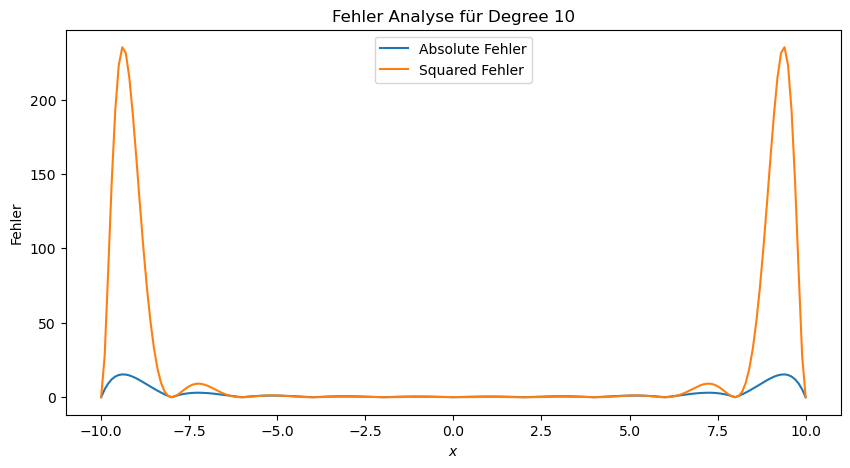

Degree 15:
Max Absolute Fehler: 17795.83
Max Squared Fehler: 316691514.59


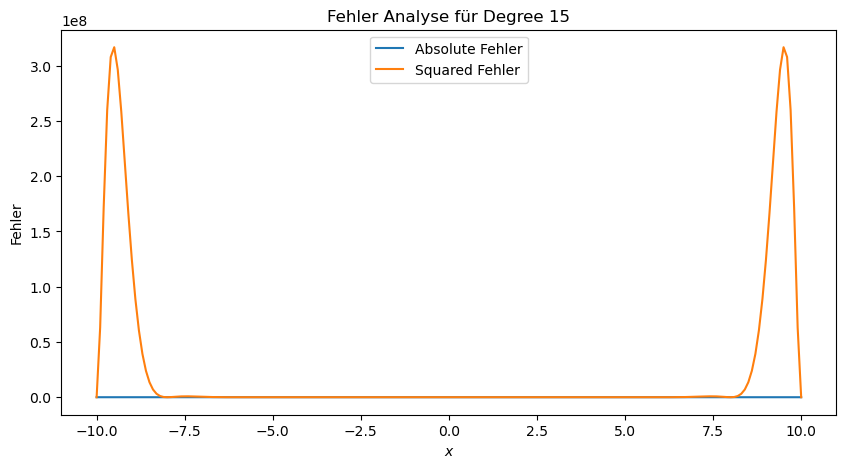

In [44]:
for degree in [10, 15]:
    errors = np.abs(mean_y_k[degree] - true_y)
    squared_errors = (mean_y_k[degree] - true_y) ** 2
    
    print(f"Degree {degree}:")
    print(f"Max Absolute Fehler: {np.max(errors):.2f}")
    print(f"Max Squared Fehler: {np.max(squared_errors):.2f}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(X, errors, label="Absolute Fehler")
    plt.plot(X, squared_errors, label="Squared Fehler")
    plt.xlabel("$x$")
    plt.ylabel("Fehler")
    plt.title(f"Fehler Analyse für Degree {degree}")
    plt.legend()
    plt.show()

Man erkennt das die größten Fehler in den Randbereichen des Definitionsbereich von x auftreten, wobei insbesondere für k=10 der absolute Fehler noch stark ist, für k=15 sind die Fehler noch deutlich größer, sodass in der Abbildung die Fehler-Skalierung deutlich größer ist ! 
Sowohl der absolute und der quadratische Fehler sind für k=15 sehr groß.